In [18]:
import numpy as np
import pandas as pd
import math
from pathlib import Path
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import matplotlib.patches as patches

from copy import deepcopy

In [4]:
test_data = np.load("data/train/datasetMC.npz")
train_data = np.load("data/train/datasetMC_train.npz")

In [5]:
def get_value_segment(data, args):

    original_shape = data.shape
    reshaped_data = data.reshape(41, 48*5, original_shape[1])

    first_row, last_row, first_column, last_column = args

    return reshaped_data[first_row:last_row][:,first_column:last_column].reshape((last_row - first_row) * (last_column - first_column), original_shape[1])

def get_data_segment(data, args):

    original_shape = data.shape
    reshaped_data = data.reshape(41, 48*5, original_shape[1], original_shape[1])

    first_row, last_row, first_column, last_column = args

    return reshaped_data[first_row:last_row][:,first_column:last_column].reshape((last_row - first_row) * (last_column - first_column), original_shape[1], original_shape[1])

In [6]:
args = (7, 30, 23 * 5, 30 * 5)

D_test = get_data_segment(test_data['data'], args)
V_test = get_value_segment(test_data['values'], args)
P_test = get_value_segment(test_data['properties'], args)

In [7]:
# check shapes
print("Shape of data: {}".format(D_test.shape))
print("Shape of values: {}".format(V_test.shape))
print("Shape of properties: {}".format(P_test.shape))

Shape of data: (805, 200, 200)
Shape of values: (805, 2)
Shape of properties: (805, 2)


In [8]:
D_train = train_data["data"]
V_train = train_data["values"]
P_train = train_data["properties"]
L_train = train_data["labels"]

In [9]:
# check shapes
print("Shape of data: {}".format(D_train.shape))
print("Shape of values: {}".format(V_train.shape))
print("Shape of properties: {}".format(P_train.shape))

Shape of data: (700, 200, 200)
Shape of values: (700, 2)
Shape of properties: (700, 2)


# Cleaning training data

In [10]:
DataFM_train, PropFM_train = D_train[L_train == "FM"], P_train[L_train == "FM"]
DataSK_train, PropSK_train = D_train[L_train == "SK"], P_train[L_train == "SK"]
DataSP_train, PropSP_train = D_train[L_train == "SP"], P_train[L_train == "SP"]

print(DataFM_train.shape, DataSK_train.shape, DataSP_train.shape)
print(PropFM_train.shape, PropSK_train.shape, PropSP_train.shape)

(200, 200, 200) (300, 200, 200) (200, 200, 200)
(200, 2) (300, 2) (200, 2)


In [11]:
cond_FM = PropFM_train[:,0] > .95
cond_SK = PropSK_train[:,0] > .399
cond_SP = PropSP_train[:,1] > -.9

V_FM, P_FM = V_train[L_train == "FM"], P_train[L_train == "FM"]
V_SK, P_SK = V_train[L_train == "SK"], P_train[L_train == "SK"]
V_SP, P_SP = V_train[L_train == "SP"], P_train[L_train == "SP"]

print(V_FM.shape, V_SK.shape, V_SP.shape)
print(P_FM.shape, P_SK.shape, P_SP.shape)

V_train = np.vstack((V_FM[cond_FM], V_SK[cond_SK], V_SP[cond_SP]))
P_train = np.vstack((P_FM[cond_FM], P_SK[cond_SK], P_SP[cond_SP]))

print(V_train.shape)
print(P_train.shape)

(200, 2) (300, 2) (200, 2)
(200, 2) (300, 2) (200, 2)
(470, 2)
(470, 2)


In [12]:
DataFM_train = DataFM_train[cond_FM]
DataSK_train = DataSK_train[cond_SK]
DataSP_train = DataSP_train[cond_SP]

PropFM_train = PropFM_train[cond_FM]
PropSK_train = PropSK_train[cond_SK]
PropSP_train = PropSP_train[cond_SP]

print(DataFM_train.shape, DataSK_train.shape, DataSP_train.shape)
print(PropFM_train.shape, PropSK_train.shape, PropSP_train.shape)

D_train = np.vstack((DataFM_train, DataSK_train, DataSP_train))

(200, 200, 200) (106, 200, 200) (164, 200, 200)
(200, 2) (106, 2) (164, 2)


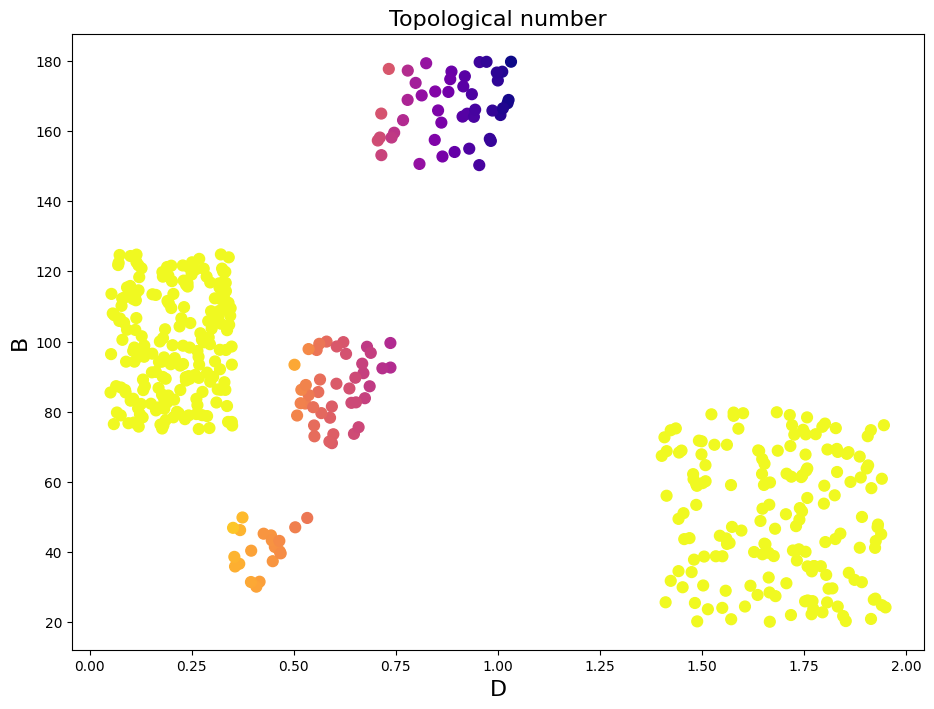

In [14]:
fig, ax = plt.subplots(figsize=(11,8))

# ax.scatter(*V_test.T, c=(P_test.T)[1], cmap="plasma", marker="o", s=60)
ax.scatter(*V_train.T, c=(P_train.T)[1], cmap="plasma", marker="o", s=60)

ax.set_title("Topological number", size=16)
ax.set_xlabel("D", size=16)
ax.set_ylabel("B", size=16)


# cbar = fig.colorbar(m)

plt.show()

In [15]:
# (6, 27, 16 * 5, 23 * 5)
# test_indeces_fe = np.r_[np.arange(0, 105), np.arange(120, 140)]
# test_indeces_fe_sk = np.r_[np.arange(105, 120), np.arange(160, 175)]
# test_indeces_sk = np.r_[np.arange(140, 160), np.arange(175, 340), np.arange(360, 375), np.arange(400, 410)]
# test_indeces_sk_sp = np.r_[np.arange(340, 360), np.arange(375, 400), np.arange(410, 445), np.arange(460, 480), np.arange(505, 515)]
# test_indeces_sp = np.r_[np.arange(445, 460), np.arange(480, 505), np.arange(515, Dall.shape[0])]

# (7, 30, 23 * 5, 30 * 5)
my_test_indeces_fe = np.r_[np.arange(0, 28*5), np.arange(32*5, 35*5)]
my_test_indeces_fe_sk = np.r_[np.arange(28*5, 32*5), np.arange(40*5, 42*5)]
my_test_indeces_sk = np.r_[np.arange(35*5, 40*5), np.arange(42*5, 84*5)]
my_test_indeces_sk_sp = np.r_[np.arange(84*5, 105*5), np.arange(109*5, 112*5)]
my_test_indeces_sp = np.r_[np.arange(105*5, 109*5), np.arange(112*5, 161*5)]


In [16]:
my_test_data = D_test[np.r_[my_test_indeces_fe, my_test_indeces_sk, my_test_indeces_sp]]

my_test_labels_fe = np.tile(np.array([1, 0, 0]), (len(my_test_indeces_fe), 1))
my_test_labels_sk = np.tile(np.array([0, 1, 0]), (len(my_test_indeces_sk), 1))
my_test_labels_sp = np.tile(np.array([0, 0, 1]), (len(my_test_indeces_sp), 1))

my_test_labels = np.r_[my_test_labels_fe, my_test_labels_sk, my_test_labels_sp]
np.savez("data/test/my_test_data", data=my_test_data, labels=my_test_labels)

my_test_data_fe_sk = D_test[my_test_indeces_fe_sk]
np.savez("data/test/my_test_data_fe_sk", data=my_test_data_fe_sk)

my_test_data_sk_sp = D_test[my_test_indeces_sk_sp]
np.savez("data/test/my_test_data_sk_sp", data=my_test_data_sk_sp)

np.savez("data/test/all_test_data", data=D_test, V=V_test, P=P_test)

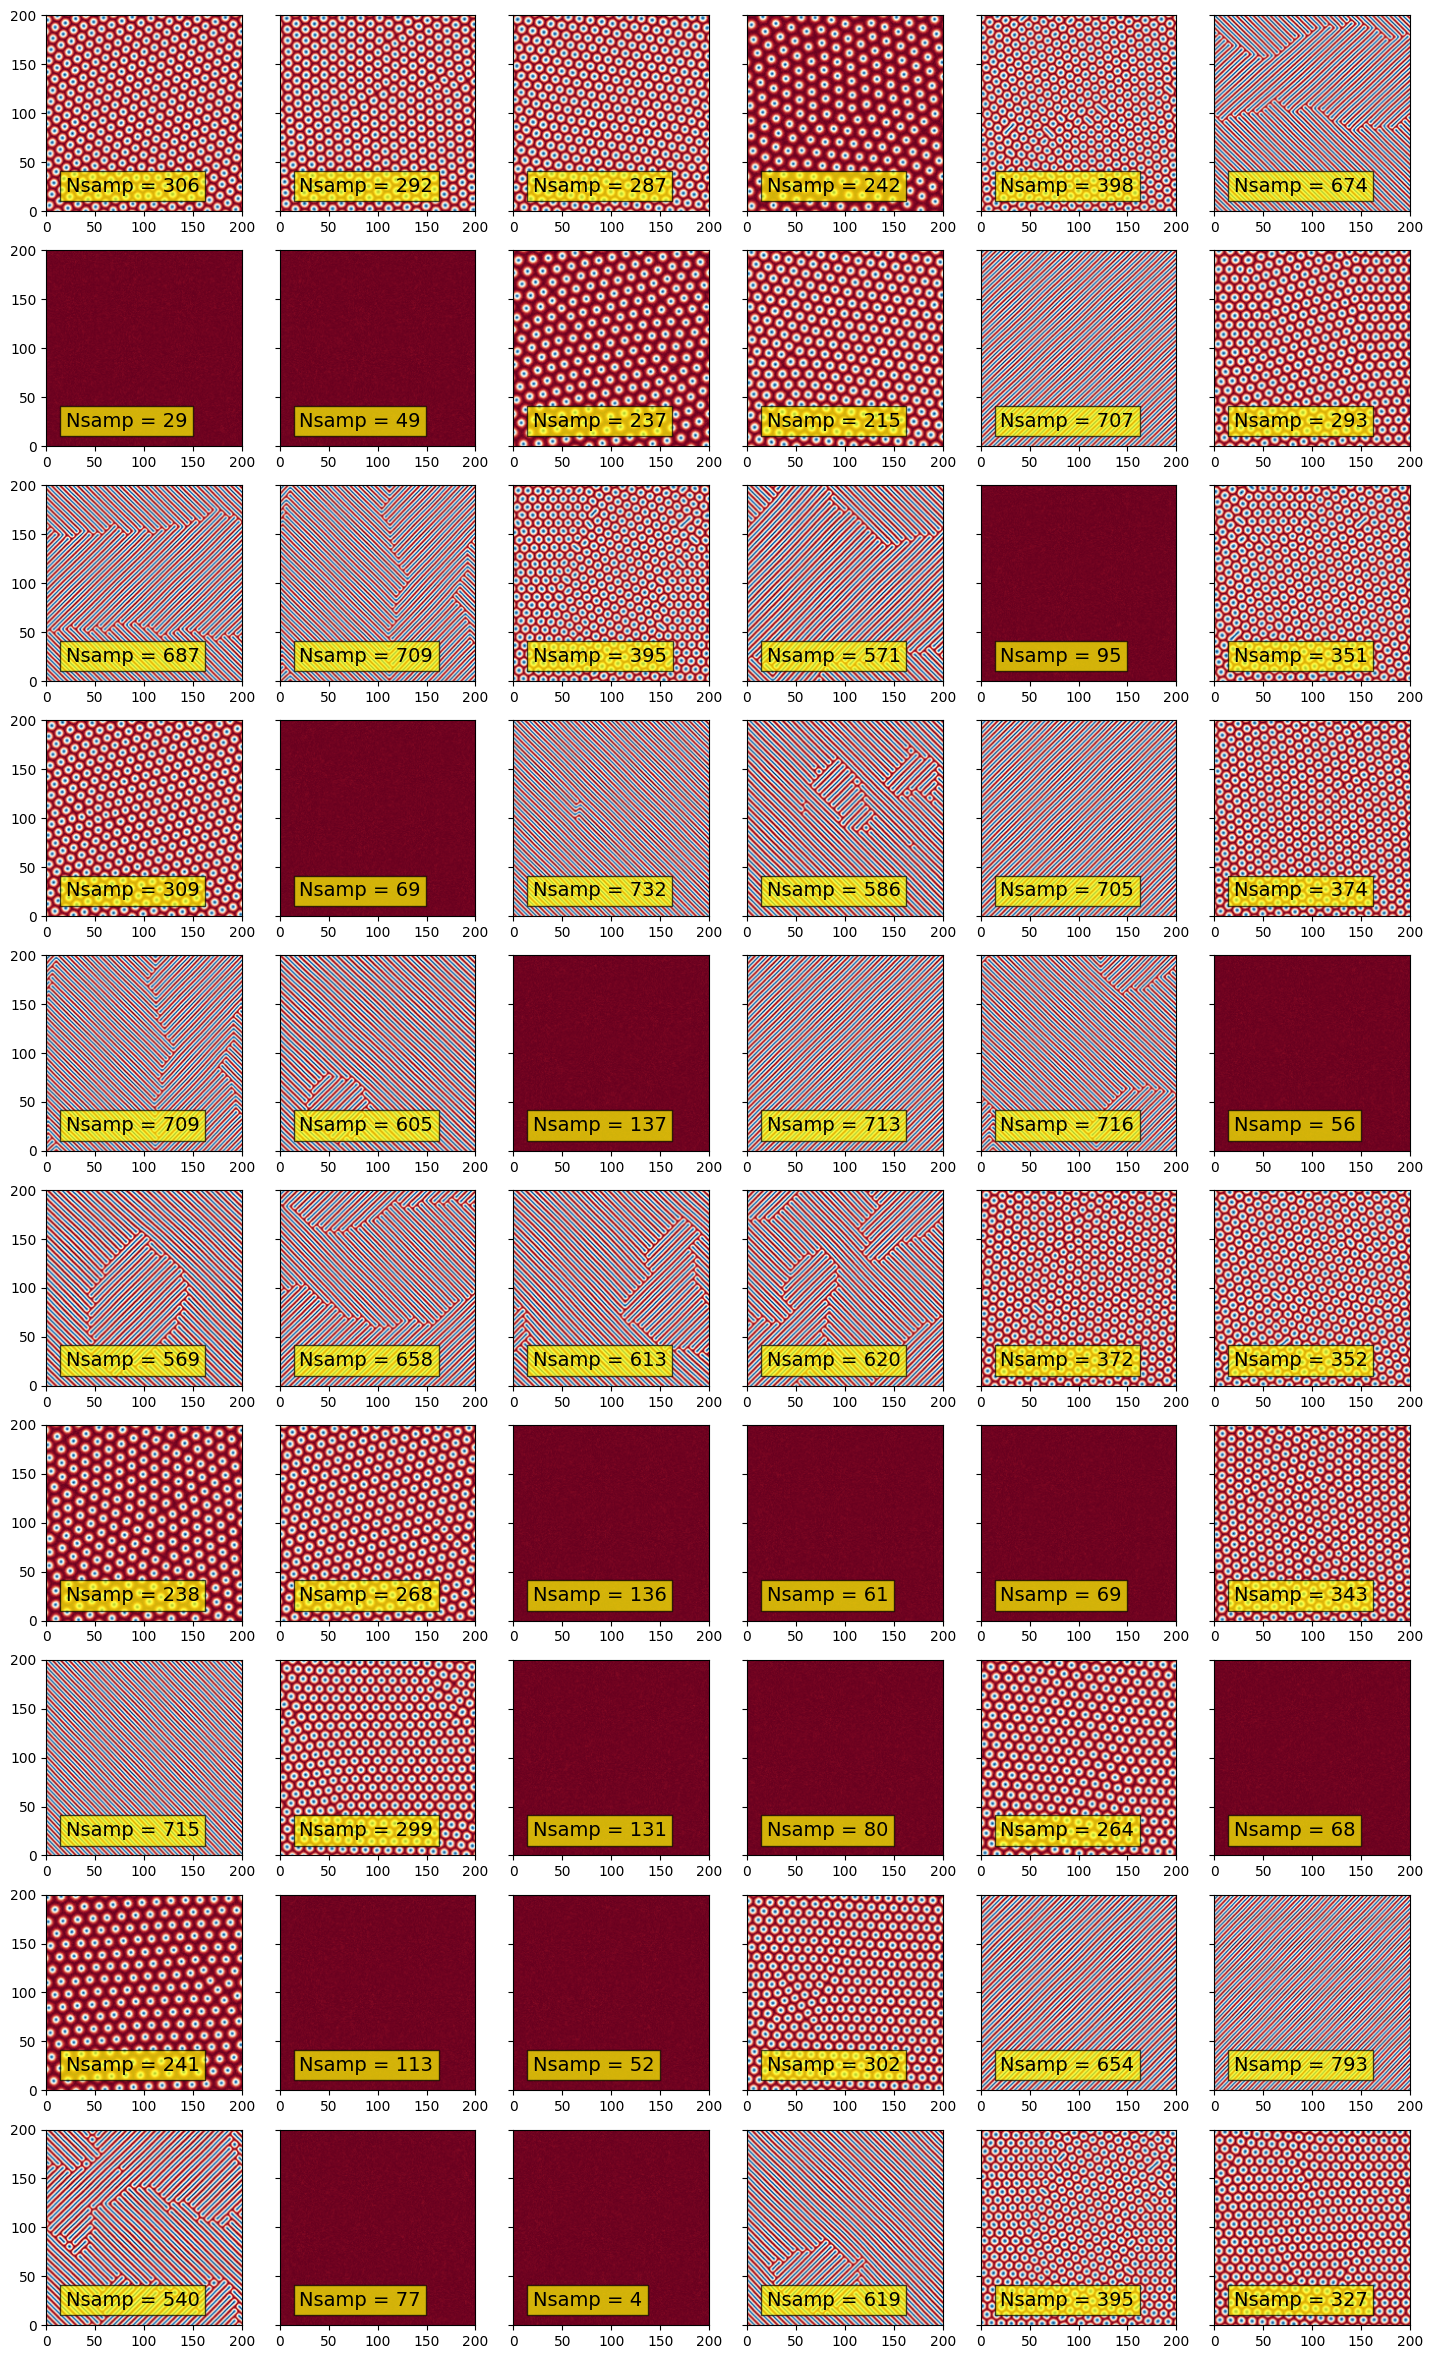

In [19]:
Nsamp = np.random.choice(np.r_[my_test_indeces_fe, my_test_indeces_sk, my_test_indeces_sp], 60)
# Nsamp = np.random.choice(my_test_indeces_sp, 60)

row_size = 6
n_rows = math.ceil(len(Nsamp) / row_size)

fig, axs = plt.subplots(n_rows, row_size, figsize=(3 * row_size, 3 * n_rows), sharey=True)

for n, num_sample in enumerate(Nsamp):
    im = axs[n // row_size, n % row_size].imshow(D_test[num_sample], vmin=0., vmax=1., cmap="RdBu")
    
    axs[n // row_size, n % row_size].set_xlim((0., 200.))
    axs[n // row_size, n % row_size].set_ylim((0., 200.))
    
    axs[n // row_size, n % row_size].text(20, 20, f'Nsamp = {Nsamp[n]}',
                color="black", size=14, 
                bbox=dict(facecolor="yellow", edgecolor="black", alpha=.7))

fig.subplots_adjust(wspace=0.03)

plt.show()

In [20]:
# load data for classification
DatasetSup = np.load("../data/train/sup_data.npz")    # load dataset

# DSup = DatasetSup["data"]           # data: magnetic configurations
# VSup = DatasetSup["values"]         # values: Dzyaloshiskii-Morya interaction and applied magnetic field
# PSup = DatasetSup["properties"]     # properties: total magnetization and topological charge

FileNotFoundError: [Errno 2] No such file or directory: 'data/sup_data.npz'

In [ ]:
print(DatasetSup.keys())

KeysView(<numpy.lib.npyio.NpzFile object at 0x000001A3B7442FD0>)


In [ ]:
print("Keys in the npz file:", list(DatasetSup.keys()))

Keys in the npz file: ['data', 'labels']
